# Pan Cancer ERBB2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
#sys.path.append('C:\\Users\\brittany henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f

import cptac
import cptac.utils as u

# GBM

In [2]:
brain = cptac.Gbm()


In [3]:
prot_and_gbm = brain.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

prot_and_gbm

Name,A1BG_proteomics,A2M_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,AAK1_proteomics,AAMDC_proteomics,AAMP_proteomics,...,ZW10_CNV,ZWILCH_CNV,ZWINT_CNV,ZXDA_CNV,ZXDB_CNV,ZXDC_CNV,ZYG11A_CNV,ZYG11B_CNV,ZYX_CNV,ZZEF1_CNV
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,0.077630,0.487228,-0.254208,-0.144373,0.551881,-0.025276,-0.467451,-0.089511,-0.078806,0.329603,...,0.067722,-0.719102,-0.724469,0.025915,0.025915,0.046797,-0.021595,-0.021595,0.045061,-0.584579
S002,-0.145975,0.798796,0.184242,-0.470603,NaN,0.390211,0.245466,-0.609998,0.118625,-0.086927,...,-0.162332,-0.147051,-0.658366,0.101335,0.101335,0.155344,0.174725,0.174725,0.384346,0.065126
S003,0.821991,1.096470,-0.094421,-0.106304,0.084578,0.176402,-0.248151,0.014061,-0.699773,-0.638462,...,-0.013009,-0.009965,-0.341251,-0.000809,-0.000809,-0.009031,-0.010699,-0.010699,0.267624,-0.004149
S004,-0.064567,0.129385,0.047751,-0.118187,0.237434,NaN,0.303847,0.322163,-0.555479,-0.363414,...,0.423260,-0.013910,-0.692011,-0.048670,-0.048670,0.014659,-0.018290,-0.018290,0.458499,-0.031579
S005,-0.763691,-1.031834,-0.217194,-0.695701,0.184173,-0.474816,-0.051789,0.344842,-0.642746,0.068863,...,-0.046543,-0.018644,-0.542862,-0.022360,-0.022360,-0.026650,-0.019001,-0.019001,0.360617,-0.015862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S111,-1.624156,-1.163916,-0.570896,0.608478,0.756814,NaN,0.136388,1.792089,-0.047550,0.595335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S112,-1.452245,-1.147384,-0.373231,0.584371,NaN,-1.670928,-0.074499,1.893627,-0.369483,0.244199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S113,-1.902994,-1.162469,-0.411892,0.534934,NaN,0.598046,-0.382636,1.997332,-0.134316,0.500731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

prot_CNV_gbm = prot_and_gbm[["ERBB2_proteomics","ERBB2_CNV"]]
prot_CNV_gbm

Name,ERBB2_proteomics,ERBB2_CNV
Sample_ID,,
S001,0.706546,0.092472
S002,-0.555668,-0.272634
S003,-0.582543,0.000568
S004,0.114293,-0.031579
S005,-0.660051,-0.015862
...,...,...
S111,-0.399584,NaN
S112,-0.782163,NaN
S113,-0.563389,NaN


In [5]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_gbm = prot_CNV_gbm.dropna(axis=0, how="any")

prot_CNV_gbm

Name,ERBB2_proteomics,ERBB2_CNV
Sample_ID,,
S001,0.706546,0.092472
S002,-0.555668,-0.272634
S003,-0.582543,0.000568
S004,0.114293,-0.031579
S005,-0.660051,-0.015862
...,...,...
S100,1.901580,0.043384
S101,-0.341260,-0.013726
S102,0.094867,-0.010768


In [6]:

x1 = prot_CNV_gbm[["ERBB2_CNV"]].values
y1 = prot_CNV_gbm[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 1.089740044679159
R-squared: 0.05494554363999493
P-value: 0.020169401833214317


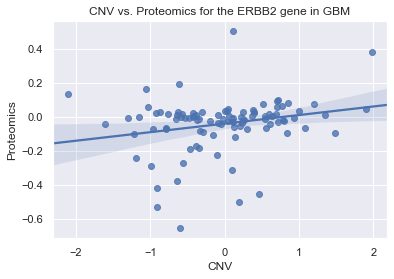

In [7]:
sns.set(style="darkgrid")
plot = sns.regplot(x=prot_CNV_gbm.columns[0], y=prot_CNV_gbm.columns[1], data=prot_CNV_gbm)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the ERBB2 gene in GBM')
plt.show()

# Kidney 

In [8]:
kidney = cptac.Ccrcc()


In [9]:
prot_CNV_Kidney = kidney.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

prot_CNV_Kidney

Name,A1BG_proteomics,A1CF_proteomics,A2M_proteomics,A4GALT_proteomics,AAAS_proteomics,AACS_proteomics,AADAC_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,...,ZWILCH_CNV,ZWINT_CNV,ZXDA_CNV,ZXDB_CNV,ZXDC_CNV,ZYG11A_CNV,ZYG11B_CNV,ZYX_CNV,ZZEF1_CNV,ZZZ3_CNV
Database_ID,NP_570602.2,NP_620310.1,NP_000005.2,NP_001304967.1,NP_056480.1,NP_076417.2,NP_001077.2,NP_001273612.1,NP_714542.1,NP_078942.3,...,ENSG00000174442.11,ENSG00000122952.16,ENSG00000198205.6,ENSG00000198455.4,ENSG00000070476.14,ENSG00000203995.9,ENSG00000162378.12,ENSG00000159840.15,ENSG00000074755.14,ENSG00000036549.12
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,-0.304302,0.641447,-0.000025,NaN,0.207831,-0.364128,NaN,-1.203886,-0.217934,0.216894,...,0.016381,0.013001,0.013331,0.013331,0.012262,0.013783,0.013783,0.022275,0.020393,0.013783
S002,1.195915,0.194620,1.360294,NaN,0.126956,-0.572843,NaN,-1.596546,NaN,0.221696,...,0.022946,0.019186,0.011710,0.011710,0.019669,0.021678,0.021678,0.021366,0.025461,0.021678
S003,-0.286155,-0.780455,-0.101089,NaN,0.292629,0.035812,NaN,NaN,NaN,0.300863,...,0.121135,0.121480,-0.470122,-0.470122,0.125552,0.104257,0.104257,0.116052,-0.488441,0.131674
S004,0.135730,0.404286,0.261384,NaN,0.155568,0.336311,NaN,NaN,0.709046,0.244198,...,-0.021340,-0.021430,-0.550917,-0.550917,-0.026006,-0.020833,-0.020833,0.394042,-0.017815,-0.020833
S005,-0.123959,-0.677773,-0.362547,NaN,0.187605,-0.320026,NaN,-1.300148,-0.153216,0.229676,...,0.041436,0.123367,0.086172,0.086172,0.160586,0.048854,0.048854,0.049045,-0.033958,0.039913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S190,-0.533915,0.352304,-0.297937,NaN,0.049507,0.421582,NaN,NaN,NaN,0.108650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S191,-0.732322,0.111213,-0.877605,NaN,0.058466,-0.241223,NaN,NaN,NaN,0.166769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
prot_CNV_Kidney = prot_CNV_Kidney[["ERBB2_proteomics","ERBB2_CNV"]]

In [11]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_Kidney = prot_CNV_Kidney.dropna(axis=0, how="any")

prot_CNV_Kidney

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_001005862.1,ENSG00000141736.13
Sample_ID,,
S001,-0.570495,0.019178
S002,-0.382060,0.024763
S003,-0.471566,0.107531
S004,-0.133866,-0.016357
S005,-0.643426,-0.034231
...,...,...
S106,-0.107965,0.037587
S107,-0.530914,-0.001263


In [12]:

x1 = prot_CNV_Kidney[["ERBB2_CNV"]].values
y1 = prot_CNV_Kidney[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: -0.4196225884720236
R-squared: 0.016623638672803375
P-value: 0.1794597138360491


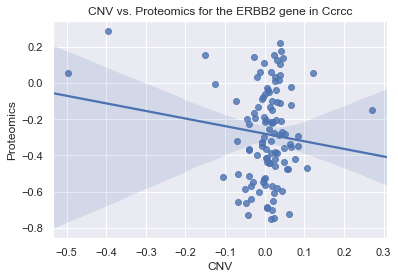

In [13]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_Kidney)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the ERBB2 gene in Ccrcc')
plt.show()

# Endometrial 

In [14]:
en = cptac.Endometrial()

In [15]:
prot_CNV_en = en.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")


In [46]:
prot_CNV_en = prot_CNV_en[["ERBB2_proteomics","ERBB2_CNV"]]
prot_CNV_en.head(100)

Name,ERBB2_proteomics,ERBB2_CNV
Sample_ID,,
S001,0.3000,0.01
S002,0.4490,0.01
S003,0.5160,0.01
S005,0.7810,-0.04
S006,1.6800,1.42
...,...,...
S099,0.5890,-0.03
S100,1.8000,0.78
S101,0.0483,-0.04


In [17]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_en = prot_CNV_en.dropna(axis=0, how="any")
prot_CNV_en

Name,ERBB2_proteomics,ERBB2_CNV
Sample_ID,,
S001,0.3000,0.01
S002,0.4490,0.01
S003,0.5160,0.01
S005,0.7810,-0.04
S006,1.6800,1.42
...,...,...
S099,0.5890,-0.03
S100,1.8000,0.78
S101,0.0483,-0.04


In [18]:

x1 = prot_CNV_en[["ERBB2_CNV"]].values
y1 = prot_CNV_en[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.03211248518965457
R-squared: 0.019597152324496787
P-value: 0.17603574854847948


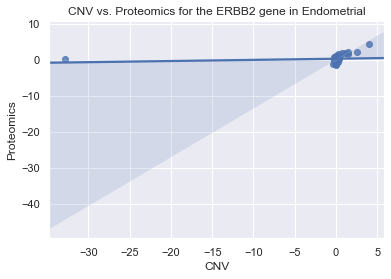

In [19]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_en)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the ERBB2 gene in Endometrial')
plt.show()

# Ovarian 

In [20]:
Ovar = cptac.Ovarian()

In [21]:
prot_CNV_Ovar = Ovar.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [22]:
prot_CNV_Ovar = prot_CNV_Ovar[["ERBB2_proteomics","ERBB2_CNV"]]
prot_CNV_Ovar

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_004439,NaN
Sample_ID,,
S001,NaN,-0.1395
S002,-0.518397,-0.1418
S003,NaN,0.7570
S004,NaN,-0.4652
S005,NaN,-0.1090
...,...,...
S127,-0.474350,NaN
S128,0.830347,NaN


In [23]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_Ovar = prot_CNV_Ovar.dropna(axis=0, how="any")
prot_CNV_Ovar

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_004439,NaN
Sample_ID,,
S002,-0.518397,-0.1418
S006,-0.522879,-0.4985
S007,-0.569217,-0.2802
S009,0.508088,0.6951
S011,2.888529,3.7803
...,...,...
S106,-0.950649,-0.4732
S107,-0.155643,-0.2495


In [24]:

x1 = prot_CNV_Ovar[["ERBB2_CNV"]].values
y1 = prot_CNV_Ovar[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.8052762458885772
R-squared: 0.5592912359276955
P-value: 1.0418266932486044e-15


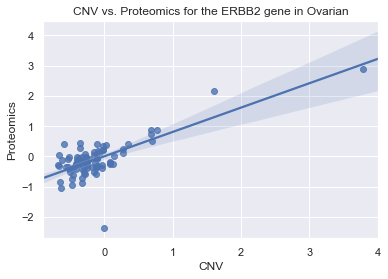

In [25]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_Ovar)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the ERBB2 gene in Ovarian')
plt.show()

# Colon

In [26]:
colon = cptac.Colon()

In [27]:
colon.list_data()

Below are the dataframes contained in this dataset:
	clinical
		Dimensions: (210, 22)
	derived_molecular
		Dimensions: (110, 7)
	miRNA
		Dimensions: (105, 989)
	phosphoproteomics
		Dimensions: (197, 31339)
	proteomics
		Dimensions: (197, 8067)
	somatic_mutation
		Dimensions: (93717, 3)
	somatic_mutation_binary
		Dimensions: (106, 86026)
	transcriptomics
		Dimensions: (106, 13482)


colon does not have cnv data -

# Brca 

In [28]:
brca = cptac.Brca()

In [29]:
prot_CNV_brca = brca.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [30]:
prot_CNV_brca = prot_CNV_brca[["ERBB2_proteomics","ERBB2_CNV"]]
prot_CNV_brca

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_004439.2|NP_001276865.1|NP_001005862.1|NP_001276866.1|NP_001276867.1,ENSG00000141736.9
Sample_ID,,
S001,-5.2223,-0.536
S002,-4.6417,0.101
S003,-3.7213,-0.131
S004,-2.1194,-0.034
S005,-2.8741,-0.251
...,...,...
S118,0.5064,2.329
S119,-2.3005,0.021


In [31]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_brca = prot_CNV_brca.dropna(axis=0, how="any")
prot_CNV_brca

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_004439.2|NP_001276865.1|NP_001005862.1|NP_001276866.1|NP_001276867.1,ENSG00000141736.9
Sample_ID,,
S001,-5.2223,-0.536
S002,-4.6417,0.101
S003,-3.7213,-0.131
S004,-2.1194,-0.034
S005,-2.8741,-0.251
...,...,...
S118,0.5064,2.329
S119,-2.3005,0.021


In [32]:

x1 = prot_CNV_brca[["ERBB2_CNV"]].values
y1 = prot_CNV_brca[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 2.005538527868885
R-squared: 0.6397083476617332
P-value: 2.2684172901548093e-28


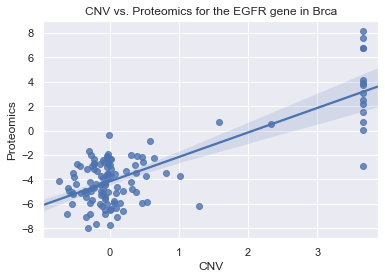

In [33]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_brca)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Brca')
plt.show()

# LUAD

In [34]:
luad = cptac.Luad()

In [35]:
prot_CNV_luad = luad.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [36]:
prot_CNV_luad = prot_CNV_luad[["ERBB2_proteomics","ERBB2_CNV"]]
prot_CNV_luad

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_004439.2|NP_001276865.1|NP_001005862.1|NP_001276866.1|NP_001276867.1,NaN
Sample_ID,,
S001,-1.40092,0.1144
S002,0.30993,0.2033
S003,0.22888,0.4737
S004,-1.86901,0.0059
S005,0.72455,0.2091
...,...,...
S211,-1.64012,NaN
S212,-1.38597,NaN


In [37]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_luad = prot_CNV_luad.dropna(axis=0, how="any")
prot_CNV_luad

Name,ERBB2_proteomics,ERBB2_CNV
Database_ID,NP_004439.2|NP_001276865.1|NP_001005862.1|NP_001276866.1|NP_001276867.1,NaN
Sample_ID,,
S001,-1.40092,0.1144
S002,0.30993,0.2033
S003,0.22888,0.4737
S004,-1.86901,0.0059
S005,0.72455,0.2091
...,...,...
S109,-0.48493,0.2509
S110,0.17624,-0.0722


In [38]:

x1 = prot_CNV_luad[["ERBB2_CNV"]].values
y1 = prot_CNV_luad[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 2.254261493621483
R-squared: 0.363515107620472
P-value: 3.1758281019569836e-12


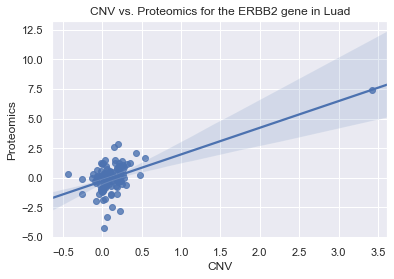

In [39]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_luad)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the ERBB2 gene in Luad')
plt.show()

# HNSCC

In [40]:
Hnscc = cptac.Hnscc()

In [41]:
prot_CNV_hnscc = Hnscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [42]:
prot_CNV_hnscc = prot_CNV_hnscc[["ERBB2_proteomics","ERBB2_CNV"]]
prot_CNV_hnscc

Name,ERBB2_proteomics,ERBB2_CNV
Sample_ID,,
S001,15274.890630,0.139
S002,8924.073242,0.215
S003,21159.345700,0.034
S004,5236.111816,-0.004
S005,17062.019530,0.188
...,...,...
S193,77667.429690,NaN
S194,21294.433590,NaN
S195,44598.792970,NaN


In [43]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_hnscc = prot_CNV_hnscc.dropna(axis=0, how="any")
prot_CNV_hnscc

Name,ERBB2_proteomics,ERBB2_CNV
Sample_ID,,
S001,15274.890630,0.139
S002,8924.073242,0.215
S003,21159.345700,0.034
S004,5236.111816,-0.004
S005,17062.019530,0.188
...,...,...
S104,11709.386720,0.016
S105,4551.542480,0.144
S106,5185.084473,0.004


In [44]:
x1 = prot_CNV_hnscc[["ERBB2_CNV"]].values
y1 = prot_CNV_hnscc[["ERBB2_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 82567.34354369559
R-squared: 0.3512820814477538
P-value: 1.0269668375395123e-10


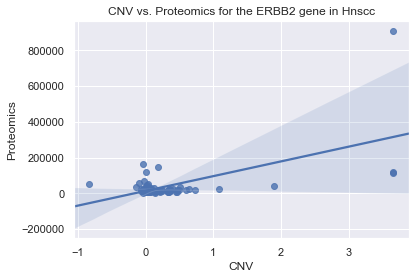

In [45]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_hnscc)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the ERBB2 gene in Hnscc')
plt.show()